# MAJOR PROJECT


# Sign Language Gesture Recognition

### This project focuses on developing a real-time sign language gesture recognition and translation system using computer vision and deep learning techniques. The primary goal is to create a system that can recognize and translate sign language gestures into text , enabling effective communication between individuals who are deaf or hard of hearing and those who may not understand sign language.

## 1.Installing and importing dependencies 

In [1]:
import tensorflow

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils 

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False                  
    results = model.process(image)                 
    image.flags.writeable = True                  
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [5]:
def draw_landmarks(image, results):
    #  pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS, mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)) 
    #  left hand 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)) 
    #  right hand 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        frame=cv2.flip(frame, 1)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

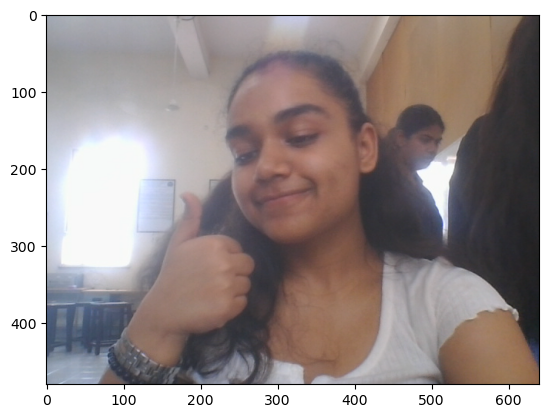

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [11]:
draw_landmarks(frame, results)

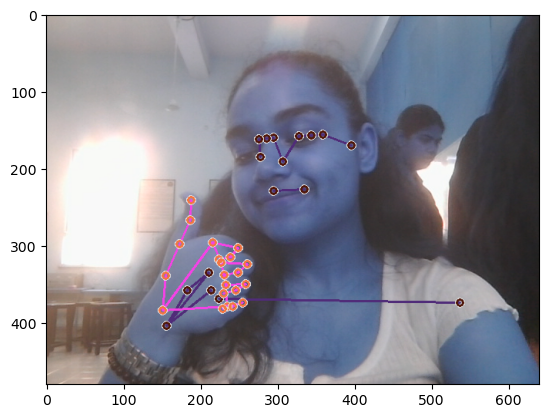

In [12]:
plt.imshow(frame)

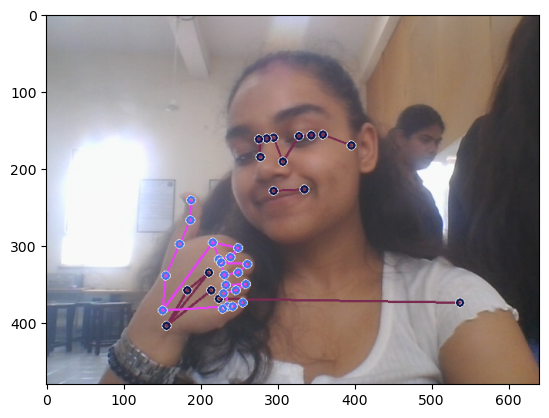

In [13]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [19]:
results.pose_landmarks

landmark {
  x: 0.4798388
  y: 0.39868817
  z: -1.0614024
  visibility: 0.9999302
}
landmark {
  x: 0.5132786
  y: 0.330098
  z: -1.0218946
  visibility: 0.9998435
}
landmark {
  x: 0.53760374
  y: 0.32826883
  z: -1.0220597
  visibility: 0.999843
}
landmark {
  x: 0.5624298
  y: 0.32639152
  z: -1.0218266
  visibility: 0.9998144
}
landmark {
  x: 0.46184793
  y: 0.33348978
  z: -0.96072423
  visibility: 0.9998525
}
landmark {
  x: 0.44708142
  y: 0.33551267
  z: -0.96001256
  visibility: 0.999863
}
landmark {
  x: 0.4315762
  y: 0.3391518
  z: -0.960302
  visibility: 0.9998544
}
landmark {
  x: 0.6195597
  y: 0.35539165
  z: -0.6299509
  visibility: 0.999857
}
landmark {
  x: 0.434817
  y: 0.3861945
  z: -0.31620228
  visibility: 0.99983865
}
landmark {
  x: 0.52346236
  y: 0.47471502
  z: -0.91760933
  visibility: 0.9999116
}
landmark {
  x: 0.46244645
  y: 0.47870138
  z: -0.82921326
  visibility: 0.99986047
}
landmark {
  x: 0.83935595
  y: 0.7800585
  z: -0.45006067
  visibility: 

In [20]:
results.pose_landmarks.landmark

[x: 0.4798388
y: 0.39868817
z: -1.0614024
visibility: 0.9999302
, x: 0.5132786
y: 0.330098
z: -1.0218946
visibility: 0.9998435
, x: 0.53760374
y: 0.32826883
z: -1.0220597
visibility: 0.999843
, x: 0.5624298
y: 0.32639152
z: -1.0218266
visibility: 0.9998144
, x: 0.46184793
y: 0.33348978
z: -0.96072423
visibility: 0.9998525
, x: 0.44708142
y: 0.33551267
z: -0.96001256
visibility: 0.999863
, x: 0.4315762
y: 0.3391518
z: -0.960302
visibility: 0.9998544
, x: 0.6195597
y: 0.35539165
z: -0.6299509
visibility: 0.999857
, x: 0.434817
y: 0.3861945
z: -0.31620228
visibility: 0.99983865
, x: 0.52346236
y: 0.47471502
z: -0.91760933
visibility: 0.9999116
, x: 0.46244645
y: 0.47870138
z: -0.82921326
visibility: 0.99986047
, x: 0.83935595
y: 0.7800585
z: -0.45006067
visibility: 0.99583864
, x: 0.35065177
y: 0.76961243
z: -0.06911735
visibility: 0.99816316
, x: 1.0393343
y: 1.205041
z: -0.753425
visibility: 0.38003293
, x: 0.11824467
y: 1.16797
z: -0.79803306
visibility: 0.87082124
, x: 1.010009
y: 1.4

In [21]:
len(results.pose_landmarks.landmark)

33

In [22]:
frame

array([[[178, 168, 162],
        [181, 171, 165],
        [182, 172, 166],
        ...,
        [ 56,  54,  61],
        [ 54,  53,  57],
        [ 51,  51,  53]],

       [[179, 170, 162],
        [181, 171, 163],
        [182, 172, 164],
        ...,
        [ 55,  54,  58],
        [ 55,  53,  56],
        [ 56,  53,  55]],

       [[181, 171, 163],
        [181, 171, 163],
        [181, 171, 163],
        ...,
        [ 55,  54,  57],
        [ 55,  54,  56],
        [ 55,  54,  57]],

       ...,

       [[175, 157, 145],
        [176, 158, 146],
        [176, 158, 146],
        ...,
        [ 77, 102, 141],
        [ 75, 101, 138],
        [ 71,  99, 135]],

       [[178, 158, 146],
        [178, 158, 146],
        [176, 157, 146],
        ...,
        [ 74, 102, 141],
        [ 71,  99, 137],
        [ 70,  97, 136]],

       [[180, 159, 149],
        [178, 158, 148],
        [176, 157, 146],
        ...,
        [ 71,  98, 139],
        [ 69,  97, 138],
        [ 67,  96, 137]]

## 3. Extracting keypoint values

In [23]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [24]:
len(pose)

132

In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [26]:
len(pose)

132

In [27]:
len(extract_keypoints(results))

258

## 4. Setup folders for collection

In [100]:
DATA_PATH = os.path.join('KRITI_DATA') 
actions = np.array(['Goodbye','Hello','Thanks','I_love_you','Yes','No','House','Sleep','Awake'])   
no_sequences = 30
#Videos = 30 frames 
sequence_length = 30


In [101]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

## 5. Collecting keypoint values for training and testing

## 6. Data preprocessing 

In [102]:
#creating labels
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [103]:
label_map = {label:num for num, label in enumerate(actions)}

In [104]:
label_map

{'Goodbye': 0,
 'Hello': 1,
 'Thanks': 2,
 'I_love_you': 3,
 'Yes': 4,
 'No': 5,
 'House': 6,
 'Sleep': 7,
 'Awake': 8}

In [105]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [106]:
len(sequences)

270

In [81]:
np.array(sequences).shape

(270, 30, 258)

In [82]:
np.array(labels).shape

(270,)

In [107]:
X = np.array(sequences)

In [108]:
X.shape

(270, 30, 258)

In [109]:
y = to_categorical(labels).astype(int)

In [110]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [112]:
X_test.shape

(14, 30, 258)

In [113]:
X_train.shape

(256, 30, 258)

In [114]:
y_test.shape

(14, 9)

In [115]:
y_train.shape

(256, 9)

## 7. Building and training LSTM neural network 

In [116]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [117]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [118]:

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 258)))  # Update input shape here
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))



In [119]:
X.shape

(270, 30, 258)

In [120]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [121]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
8/8 [==============================] - 4s 47ms/step - loss: 2.1678 - categorical_accuracy: 0.1172
Epoch 2/2000
8/8 [==============================] - 0s 43ms/step - loss: 1.9357 - categorical_accuracy: 0.1641
Epoch 3/2000
8/8 [==============================] - 0s 43ms/step - loss: 1.8400 - categorical_accuracy: 0.3086
Epoch 4/2000
8/8 [==============================] - 0s 45ms/step - loss: 1.3700 - categorical_accuracy: 0.4805
Epoch 5/2000
8/8 [==============================] - 0s 44ms/step - loss: 1.3660 - categorical_accuracy: 0.6016
Epoch 6/2000
8/8 [==============================] - 0s 44ms/step - loss: 1.5493 - categorical_accuracy: 0.5430
Epoch 7/2000
8/8 [==============================] - 0s 44ms/step - loss: 1.4347 - categorical_accuracy: 0.5234
Epoch 8/2000
8/8 [==============================] - 0s 45ms/step - loss: 2.7643 - categorical_accuracy: 0.5312
Epoch 9/2000
8/8 [==============================] - 0s 44ms/step - loss: 10.5018 - categorical_accuracy: 0.2422


KeyboardInterrupt: 

In [122]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            82688     
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 9)                 297       
                                                                 
Total params: 237449 (927.54 KB)
Trainable params: 237

## 8. Make predictions

In [123]:
res = model.predict(X_test)
len(res)

1/1 [==============================] - 0s 467ms/step


14

In [124]:
for i in range(14):
    print("test:" ,actions[np.argmax(y_test[i])],"  results:" ,actions[np.argmax(res[i])])
    

test: I_love_you   results: I_love_you
test: Goodbye   results: Goodbye
test: Awake   results: Awake
test: Thanks   results: Thanks
test: Goodbye   results: Goodbye
test: No   results: No
test: House   results: House
test: Goodbye   results: I_love_you
test: No   results: No
test: Goodbye   results: Goodbye
test: Hello   results: Hello
test: No   results: No
test: Hello   results: Hello
test: House   results: House


## 9. Save Weights

In [125]:
model.save('kritifinalfinal2.h5')

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [126]:
from tensorflow.keras.models import load_model



In [127]:
model=load_model('kritifinalfinal2.h5')

## 10. Evaluation using confusion matrix and accuracy  

In [130]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [131]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 38ms/step


In [132]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [133]:
multilabel_confusion_matrix(ytrue, yhat)


array([[[10,  0],
        [ 1,  3]],

       [[12,  0],
        [ 0,  2]],

       [[13,  0],
        [ 0,  1]],

       [[12,  1],
        [ 0,  1]],

       [[11,  0],
        [ 0,  3]],

       [[12,  0],
        [ 0,  2]],

       [[13,  0],
        [ 0,  1]]], dtype=int64)

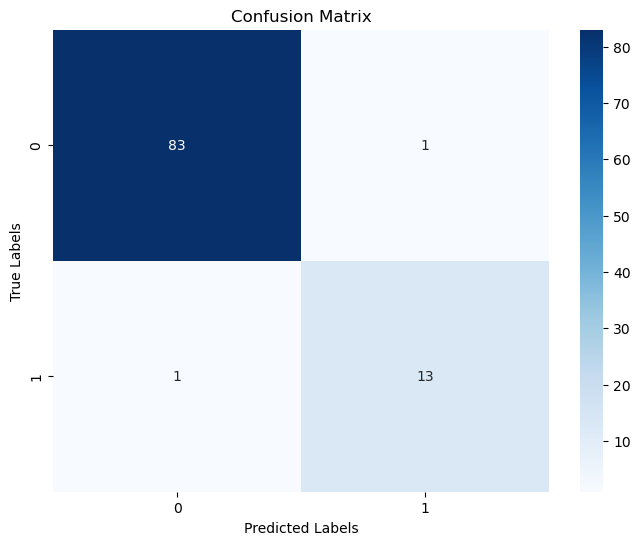

In [134]:
from sklearn.metrics import multilabel_confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


confusion_matrix = multilabel_confusion_matrix(ytrue, yhat)
combined_matrix = confusion_matrix.sum(axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(combined_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [135]:

accuracy_score(ytrue, yhat)

0.9285714285714286

# Evaluation Metrics

In [136]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


# Calculate precision
precision = precision_score(ytrue, yhat, average='weighted')


# Calculate F1-score
f1 = f1_score(ytrue, yhat, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(ytrue, yhat)

print(f"Precision: {precision}")

print(f"F1-score: {f1}")
print(f"Accuracy: {accuracy}")

Precision: 0.9642857142857143
F1-score: 0.9353741496598639
Accuracy: 0.9285714285714286


## 11. Test in real time

In [137]:
X_test[0].shape

(30, 258)

In [138]:
np.expand_dims(X_test[0],axis=0)

array([[[ 0.45360208,  0.35648853, -1.11841476, ...,  0.21078865,
          0.37177423, -0.03729678],
        [ 0.44347882,  0.33876526, -1.02303958, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.43855062,  0.3306326 , -1.02234757, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.40830192,  0.35668081, -0.51575243, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.40812421,  0.35714668, -0.5165453 , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.40821257,  0.35725826, -0.51574397, ...,  0.        ,
          0.        ,  0.        ]]])

In [139]:
model.predict(np.expand_dims(X_test[0],axis=0))

1/1 [==============================] - 0s 31ms/step


array([[2.2002489e-03, 6.8304231e-05, 9.4547133e-05, 9.0184134e-01,
        9.4040006e-02, 1.6935403e-03, 8.1764010e-06, 4.9776580e-05,
        4.0888726e-06]], dtype=float32)

### Signs (Right Hand)
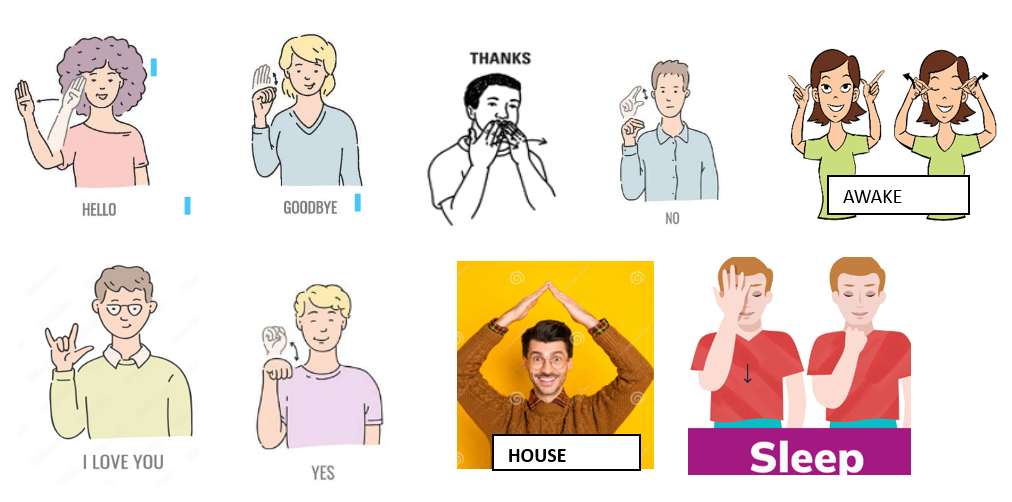



In [145]:
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        frame=cv2.flip(frame,1)

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            predictions.append(np.argmax(res))
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]
                
           
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
            
            
        

                # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

# RESULTS
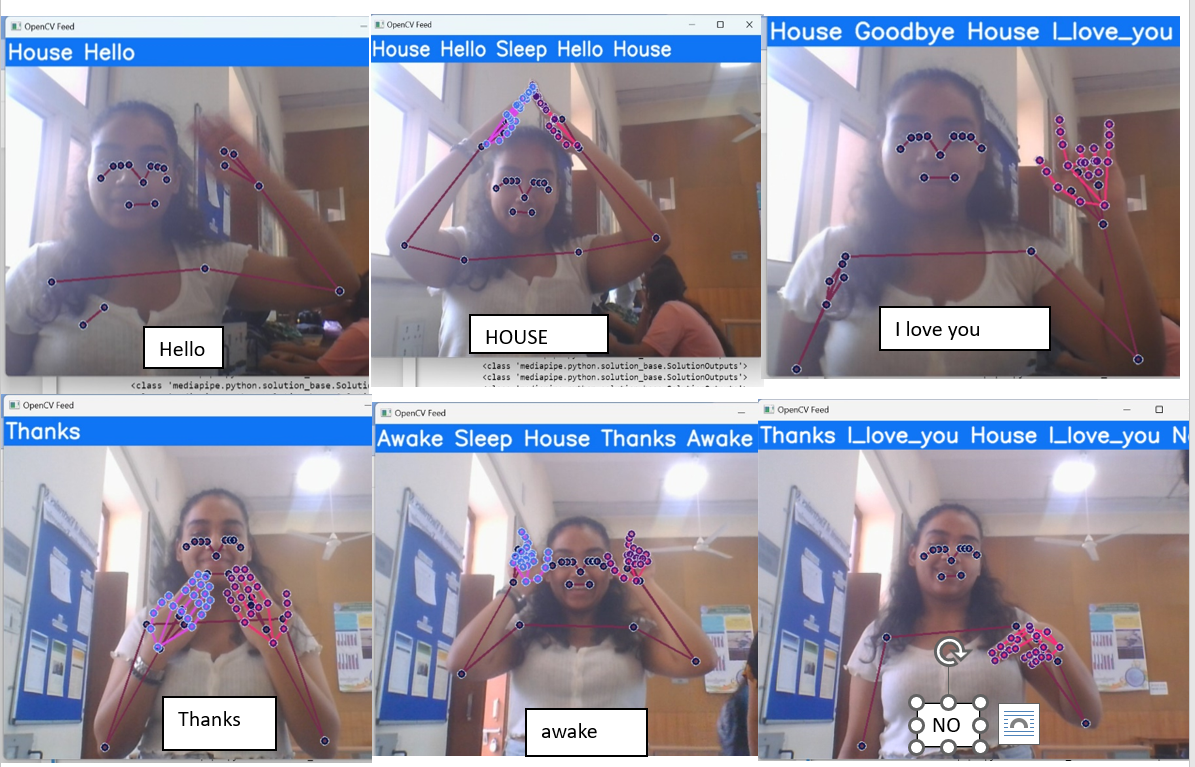

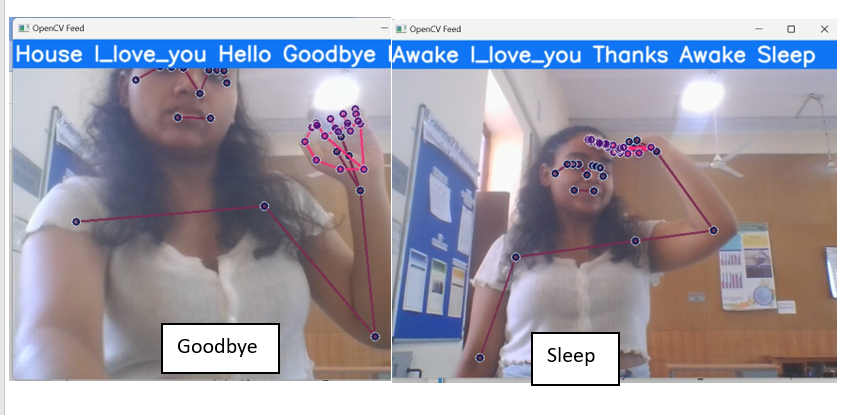